In [1]:
import numpy as np
import math
from scipy.optimize import minimize
import matplotlib.pyplot as plt

*Define my data set*

In [23]:
size = 10
sigma_noise = 0.3
x_data = np.random.uniform(0, 1, size)
y_data = np.sin(2 * math.pi * x_data) + np.random.normal(0, sigma_noise, size)

*Define polynomial function*

In [24]:
def poly_func(x, a, b, c, d, e, f, g, h, i, j):
    return a + b*x + c*x**2 + d*x**3 + e*x**4 + f*x**5 + g*x**6 + h*x**7 + i*x**8 + j*x**9  

*Error function with a penalty term, with $\ln(\lambda) = -18, 0$*

In [25]:
def e_function(w, lam):
    y_fit_internal = poly_func(x_data, *w)
    error_sum = 0.5 * np.sum((y_fit_internal - y_data)**2)
    penalty = 0.5 * lam * np.sum(w**2)
    return error_sum + penalty

<>:24: SyntaxWarning: invalid escape sequence '\l'
/tmp/xpython_42/1409959632.py:24: SyntaxWarning: invalid escape sequence '\l'
  ax.set_title(f'Regularization: $\ln \lambda = {ln_lam}$')


For ln(lambda) = -18:
Fitting Parameters: [ 1.65152694e-01 -3.34308343e+00  6.19724599e+01 -1.90830061e+02
  1.34508332e+02  1.21008123e+02 -5.15613305e+01 -1.44584627e+02
 -7.21278627e+01  1.53232364e+02]

For ln(lambda) = 0:
Fitting Parameters: [ 0.33780736 -0.03892558 -0.2834826  -0.31812603 -0.28177592 -0.22792557
 -0.1754304  -0.13010558 -0.09297237 -0.0633891 ]



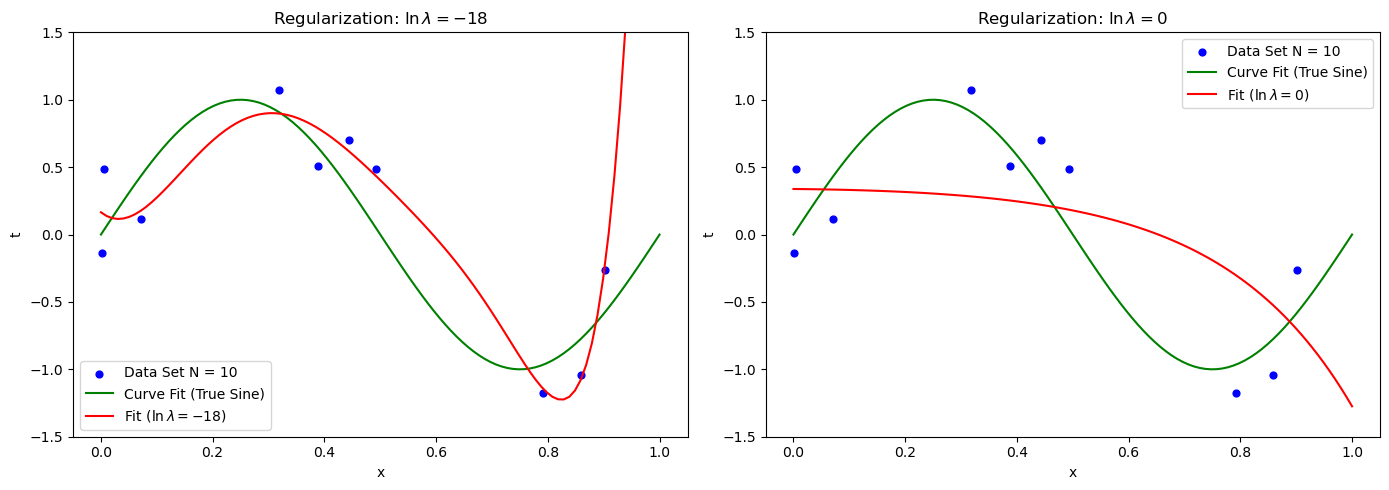

In [44]:
ln_lambdas = [-18, 0]

# actual function sin
x_plot = np.linspace(0, 1, 100)
y_true = np.sin(2 * math.pi * x_plot)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for i, ln_lam in enumerate(ln_lambdas):
    lam = np.exp(ln_lam)
    res = minimize(e_function, x0=np.zeros(10), args=(lam,))
    w_opt = res.x
    
    y_fit_data = poly_func(x_data, *w_opt)
    e_rms = np.sqrt(np.mean((y_fit_data - y_data)**2))
    
    # Plotting on the specific subplot
    ax = axes[i]
    ax.scatter(x_data, y_data, color='blue', s=24, label='Data Set N = 10')
    ax.plot(x_plot, y_true, color='green', label='Curve Fit (True Sine)')
    ax.plot(x_plot, poly_func(x_plot, *w_opt), color='red', label=rf'Fit ($\ln \lambda = {ln_lam}$)')    
    # Formatting
    ax.set_title(f'Regularization: $\ln \lambda = {ln_lam}$')
    ax.set_ylim(-1.5, 1.5)
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.legend()
    
    print(f"For ln(lambda) = {ln_lam}:")
    print(f"Fitting Parameters: {w_opt}\n")

plt.tight_layout()
plt.show()

### Write Up (Discussion)
---
Comparing my results above with Figure 1.7 in the textbook: for $\ln \lambda$ = -18 (which means the penalty term is small), my fitting concaves up badly as x gets closer to 1.0 compared to that in the textbook. The one in the textbook has a better fit without this shoot-off. Then, for $\ln \lambda$ = 0, my fitting is closer to what's in the textbook, but the difference near $x$ = 1 is still significantly visible. 

a) Let's recall the error function with penalty term (eq 1.4): $$\widetilde{E}(\mathbf{w}) = \frac{1}{2} \sum_{n=1}^{N} \{ y(x_n, \mathbf{w}) - t_n \}^2 + \frac{\lambda}{2} \|\mathbf{w}\|^2$$

where $\|\mathbf{w}\|^2 \equiv \mathbf{w}^{\text{T}}\mathbf{w} = w_0^2 + w_1^2 + \dots + w_M^2$. 
<br>
<br>

##### Explaination about the underlying reason why the two plots are so different: 
$\lambda$ according to the text governs the importance of the regularization term, and from my understanding by looking at the equation, with a smaller $\lambda$ (e.g. $\ln \lambda$ = -18 with $\lambda = 1.522997974471263 \times 10^{-8}$) the error functions $E(\mathbf{w})$ and $\widetilde{E}$ only differ for a degree of $10^{-8}$ or so. However, if $\lambda$ is close to the order of $w$ the fitting parameters (e.g. $\ln \lambda$ = 0 with $\lambda = 1.0$, the difference between $E(\mathbf{w})$ and $\widetilde{E}(\mathbf{w})$ is $\frac{1}{2} \|\mathbf{w}\|^2$. We can observe that with a larger $\lambda$ the fitting has more surpression on noise or can over-surpress the fitting. 

b) Reproduce Figure 1.8 in the textbook: 

*Training Set and N were defined earlier, so we directly start with a test set to start with:*

<>:31: SyntaxWarning: invalid escape sequence '\l'
/tmp/xpython_42/2393272191.py:31: SyntaxWarning: invalid escape sequence '\l'
  plt.title('Root-Mean-Square Error vs. $\ln \lambda$ for M = 9')


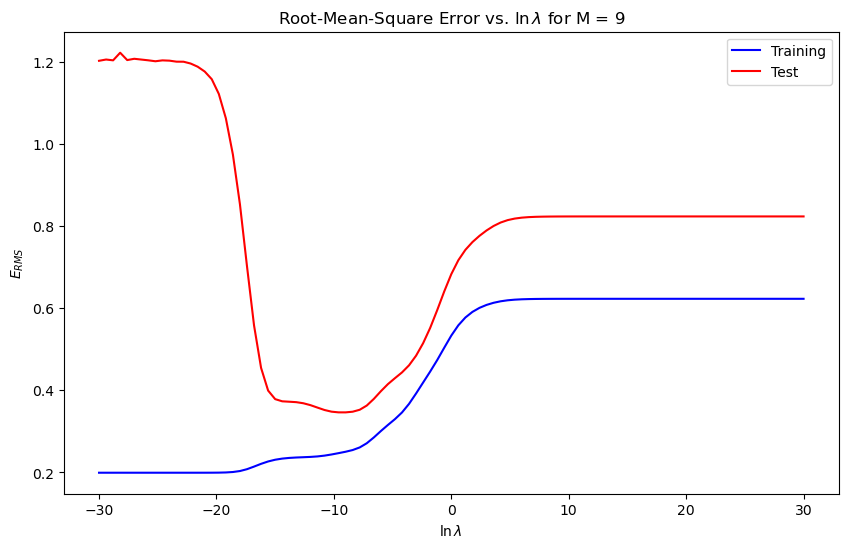

In [98]:
x_test = np.random.uniform(0, 1, size)
y_test = np.sin(2 * np.pi * x_test) + np.random.normal(0, sigma_noise, size)

# Fit the range provided in textbook with step size = 1
ln_lambdas_re = np.linspace(-30, 30, 101) 
e_rms_train = []
e_rms_test = []

for ln_lam in ln_lambdas_re:
    lam = np.exp(ln_lam)
    
    # Minimize using Training Data
    res = minimize(e_function, x0=np.zeros(10), args=(lam, x_data, y_data))
    w_opt = res.x
    
    # Calculate Training E_RMS
    y_fit_train = poly_func(x_data, *w_opt)
    e_rms_train.append(np.sqrt(np.mean((y_fit_train - y_data)**2)))
    
    # Calculate Test E_RMS
    y_fit_test = poly_func(x_test, *w_opt)
    e_rms_test.append(np.sqrt(np.mean((y_fit_test - y_test)**2)))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(ln_lambdas_re, e_rms_train, '-', color='blue', label='Training')
plt.plot(ln_lambdas_re, e_rms_test, '-', color='red', label='Test')

plt.xlabel(r'$\ln \lambda$')
plt.ylabel(r'$E_{RMS}$')
plt.title('Root-Mean-Square Error vs. $\ln \lambda$ for M = 9')
plt.legend()
plt.show()

### Write Up (Discussion)(continued)
---
b) We observed taht when $\lambda$ is close to zero (which gives $\ln \lambda = 1$), the $E_{RMS}$ from training and testing data set start becoming two parallel lines. This goes on for large $\lambda$ which gives large $\ln \lambda$. From our answers in a), we can reason that with larger penalty terms, the unique solution to minimize $\widetilde{E}(\mathbf{w})$ gets larger, and that's probably why the $E_{RMS}$ from both and training and testing data set do not converge anymore after $\ln \lambda$ passing 0 ($\lambda$ = 1). 